In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols
import numpy as np


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Linear algebra

## Session 04: LU decomposition

## Gerhard Jäger

### November 16, 2023

# LU decomposition

### triangular matrices

- an **upper triangular matrix** is a square matrix with only $0$ below the main diagonal


In [3]:
Matrix([
    [1,1,1],
    [0,1,1],
    [0,0,1]
])

Matrix([
[1, 1, 1],
[0, 1, 1],
[0, 0, 1]])

In [4]:
Matrix([
    [0,1,6],
    [0,1,1],
    [0,0,0]
])

Matrix([
[0, 1, 6],
[0, 1, 1],
[0, 0, 0]])

- a **lower triangular matrix** is a square matrix with only $0$ above the main diagonal

In [5]:
Matrix([
    [0,1,6],
    [0,1,1],
    [0,0,0]
]).T

Matrix([
[0, 0, 0],
[1, 1, 0],
[6, 1, 0]])

- the transpose of an upper triangular matrix is lower triangular, and vice versa
- *Gaussian elimination* transforms a matrix into an upper triangular matrix
- *Jordan elimination* transforms a matrix into a lower triangular matrix
- $\Rightarrow$ Gauss-Jordan elimination produces a diagonal matrix



Let us focus on the Gauss part.

In [6]:
A = Matrix([
    [1,2,1],
    [3,2,4],
    [4,4,3]
])
A

Matrix([
[1, 2, 1],
[3, 2, 4],
[4, 4, 3]])

In [7]:
E1 = Matrix([
    [1,0,0],
    [-3,1,0],
    [0,0,1]
])
E1*A

Matrix([
[1,  2, 1],
[0, -4, 1],
[4,  4, 3]])

In [8]:
E2 = Matrix([
    [1,0,0],
    [0,1,0],
    [-4,0,1]
])
E2 * E1 * A

Matrix([
[1,  2,  1],
[0, -4,  1],
[0, -4, -1]])

In [9]:
E3 = Matrix([
    [1,0,0],
    [0,1,0],
    [0,-1,1]
])
E3 * E2 * E1 * A

Matrix([
[1,  2,  1],
[0, -4,  1],
[0,  0, -2]])

Let us call this upper triangular matrix resulting from Gauss elimination $U$.

$$
\begin{aligned}
U &= \displaystyle \left[\begin{matrix}1 & 2 & 1\\0 & -4 & 1\\0 & 0 & -2\end{matrix}\right]\\
E_3 E_2 E_1 A &= U
\end{aligned}
$$

Assuming that $E_i$ is invertible (which it is), this entails

$$
\begin{aligned}
A &= (E_3 E_2 E_1)^{-1} U
\end{aligned}
$$

### Side remark: inverse of a matrix product

- suppose both $A$ and $B$ are invertible. What is $(AB)^{-1}$?

$$
\begin{aligned}
(AB)^{-1} &= X\\
XAB &= \mathbf I\\
XA &= \mathbf I B^{-1}\\
 &= B^{-1}\\
 X &= B^{-1}A^{-1}
\end{aligned}
$$

$$
\Large
    (AB)^{-1} = B^{-1}A^{-1}
$$

While we're at it: What is the transpose of a matrix product?

$$
\begin{aligned}
(A^TB^T)_{i,j} &= \sum_k a^T_{ik}b^T_{kj}\\
    &= \sum_k a_{ki}b_{jk}\\
    &= (BA)_{ji}\\
    &=((BA)^T)_{ij}
\end{aligned}
$$

Therefore 


$$
\Large
    (AB)^T = B^TA^T
$$

Still, while we're at it, what is the inverse of an transpose?

$$
\begin{aligned}
(A^T)^{-1} &= X\\
A^T X &= \mathbf I\\
X^T A &= \mathbf I\\
X^T &= A^{-1}\\
X &= (A^{-1})^T
\end{aligned}
$$


$$
\Large
   (A^T)^{-1}  = (A^{-1})^T
$$

Back to Gauss elimination.


$$
\begin{aligned}
A &= (E_3 E_2 E_1)^{-1} U\\
&= E_1^{-1} E_2^{-1} E_3^{-1} U
\end{aligned}
$$

In [10]:
E1

Matrix([
[ 1, 0, 0],
[-3, 1, 0],
[ 0, 0, 1]])

In [11]:
E1.inv()

Matrix([
[1, 0, 0],
[3, 1, 0],
[0, 0, 1]])

It is generally true:

- If $A$ is equal to $\mathbf I$ except for one off-diagonal entry, then $A^{-1}$ is like $A$ except that the off-diagonal entry is multiplied with $-1$.
    
**consequence**: all $E_i^{-1}$ are lower triangular

**fact**: The product of two lower-triangular matrices is lower triangular.

**consequences**: 

- There is a lower-triangular matrix $L$ such that 

$$
\begin{aligned}
A &= LU\\
L &= E_1^{-1} \cdots E_n^{-1}
\end{aligned}
$$
where $E_1, \ldots, E_n$ are the elimination matrices corresponding to the steps of Gauss elimination.

Our example:

In [12]:
L = E1.inv() * E2.inv() * E3.inv()
L

Matrix([
[1, 0, 0],
[3, 1, 0],
[4, 1, 1]])

$$
\begin{aligned}
A &= LU\\
\displaystyle \left[\begin{matrix}1 & 2 & 1\\3 & 2 & 4\\4 & 4 & 3\end{matrix}\right]
&=
\displaystyle \left[\begin{matrix}1 & 0 & 0\\3 & 1 & 0\\4 & 1 & 1\end{matrix}\right]
\displaystyle \left[\begin{matrix}1 & 2 & 1\\0 & -4 & 1\\0 & 0 & -2\end{matrix}\right]
\end{aligned}
$$

For each matrix $A$, there are 
- a permutation matrix $P$,
- an upper triangular matrix $U$
- a lower triangular matrix $L$,
such that 

$$
PA = LU
$$

## When is a matrix invertible?

The steps of Jordan elimination to not alter the diagonal. Hence, if, after Gauss elimination, we have no zeros on the diagonal, the rest of Gauss-Jordan will go through and we will find the inverse matrix.

Conversely, this means:

**A square matrix is invertible if and only if Gauss elimination produces an upper triangular matrix with only non-zero entries on the diagonal.**

Example of a non-invertible matrix:

In [14]:
B = Matrix(
[
    [1, -4, 2],
    [-2, 1, 3],
    [2,6,-10]
])
B

Matrix([
[ 1, -4,   2],
[-2,  1,   3],
[ 2,  6, -10]])

In [15]:
E1 = Matrix([
    [1,0,0],
    [2,1,0],
    [0,0,1]
])
E1 * B

Matrix([
[1, -4,   2],
[0, -7,   7],
[2,  6, -10]])

In [16]:
E2 = Matrix([
    [1,0,0],
    [0,1,0],
    [-2,0,1]
])
E2 * E1 * B

Matrix([
[1, -4,   2],
[0, -7,   7],
[0, 14, -14]])

In [17]:
E3 = Matrix([
    [1,0,0],
    [0,1,0],
    [0,2,1]
])
E3 * E2 * E1 * B

Matrix([
[1, -4, 2],
[0, -7, 7],
[0,  0, 0]])

We have a $0$ on the diagonal, therefore $B$ is not invertible.

LU decomposition also works for non-invertible matrices though.

In [18]:
U = E3 * E2 * E1 * B
U

Matrix([
[1, -4, 2],
[0, -7, 7],
[0,  0, 0]])

In [19]:
L = E1.inv() * E2.inv() * E3.inv()
L

Matrix([
[ 1,  0, 0],
[-2,  1, 0],
[ 2, -2, 1]])

In [20]:
L * U

Matrix([
[ 1, -4,   2],
[-2,  1,   3],
[ 2,  6, -10]])

In [57]:
B

Matrix([
[ 1, -4,   2],
[-2,  1,   3],
[ 2,  6, -10]])

## LDU decomposition

L is a lower triangular matrix with all-$1$ on the diagonal

We can factorize U further into a *diagonal matrix* and an upper triangular matrix which also has all-$1$ on the diagonal.

$$
A = LDU'
$$

- if $u_{ii}\neq 0$, we set $d_{ii} = u_{ii}$ and divide the $i$th row of U by this value
- if $u_{ii}= 0$ we set $d_{ii}=0$ and $u'_{ii} = 1$.

$$
\begin{aligned}
\left[\begin{matrix}1 & -4 & 2\\-2 & 1 & 3\\2 & 6 & -10\end{matrix}\right]
&=
\left[\begin{matrix}1 & 0 & 0\\-2 & 1 & 0\\2 & -2 & 1\end{matrix}\right]
\left[\begin{matrix}1 & -4 & 2\\0 & -7 & 7\\0 & 0 & 0\end{matrix}\right]\\[1em]
&=\left[\begin{matrix}1 & 0 & 0\\-2 & 1 & 0\\2 & -2 & 1\end{matrix}\right]
\left[\begin{matrix}1 & 0 & 0\\0 & -7 & 0\\0 & 0 & 0\end{matrix}\right]
\left[\begin{matrix}1 & -4 & 2\\0 & 1 & -1\\0 & 0 & 1\end{matrix}\right]
\end{aligned}
$$

### LU decomposition in SymPy

In [21]:
B

Matrix([
[ 1, -4,   2],
[-2,  1,   3],
[ 2,  6, -10]])

In [22]:
l,u,p = B.LUdecomposition()

In [23]:
l

Matrix([
[ 1,  0, 0],
[-2,  1, 0],
[ 2, -2, 1]])

In [24]:
u

Matrix([
[1, -4, 2],
[0, -7, 7],
[0,  0, 0]])

In [25]:
p

[]

The third component, `p`, contains the permutation required to ensure the success of LU decomposition.



Back to our old example:

In [26]:
A = Matrix([
    [1,4,5],
    [4,16,6],
    [5,6,3]
])
A

Matrix([
[1,  4, 5],
[4, 16, 6],
[5,  6, 3]])

In [27]:
l,u,p = A.LUdecomposition()

In [28]:
l

Matrix([
[1, 0, 0],
[5, 1, 0],
[4, 0, 1]])

In [29]:
u

Matrix([
[1,   4,   5],
[0, -14, -22],
[0,   0, -14]])

In [30]:
p

[[1, 2]]

### LU decomposition with numpy arrays

In [31]:
import numpy as np
from scipy.linalg import lu

In [32]:
A = np.array([
    [1,4,5],
    [4,16,6],
    [5,6,3]
])
A

array([[ 1,  4,  5],
       [ 4, 16,  6],
       [ 5,  6,  3]])

In [33]:
p,l,u = lu(A)

In [34]:
p

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [35]:
l

array([[1.  , 0.  , 0.  ],
       [0.8 , 1.  , 0.  ],
       [0.2 , 0.25, 1.  ]])

In [36]:
u

array([[ 5. ,  6. ,  3. ],
       [ 0. , 11.2,  3.6],
       [ 0. ,  0. ,  3.5]])

In [37]:
 p @ l @ u

array([[ 1.,  4.,  5.],
       [ 4., 16.,  6.],
       [ 5.,  6.,  3.]])

### Why should we bother about LU decomposition?

In numerical linear algebra, doing the LU decomposition once often saves a lot of computing time further down the road.

E.g., suppose we have done the LU decomposition of some matrix A.

$$
\begin{aligned}
A &= \left[\begin{array}{r}1 & 2 & 1\\3 & 2 & 4\\4 & 4 & 3\end{array}\right]\\[1em]
L &= \left[\begin{array}{r}1 & 0 & 0\\3 & 1 & 0\\4 & 1 & 1\end{array}\right]\\[1em]
U &= \left[\begin{array}{r}1 & 2 & 1\\0 & -4 & 1\\0 & 0 & -2\end{array}\right]
\end{aligned}
$$

Now suppose you (or rather: the computer) are/is asked to solve the linear system

$$
A\begin{bmatrix}x\\y\\z\end{bmatrix} = \begin{bmatrix}1\\1\\0\end{bmatrix}
$$

Mathematically, an obvious way is

$$
\begin{aligned}
\begin{bmatrix}x\\y\\z\end{bmatrix} &= A^{-1}\begin{bmatrix}1\\1\\0\end{bmatrix}\\[1em]
&= U^{-1}L^{-1}\begin{bmatrix}1\\1\\0\end{bmatrix}
\end{aligned}
$$

This requires us to find the inverses of L and U. However, a more efficient way is the following:

$$
\begin{aligned}
L
\begin{bmatrix}
w\\u\\v
\end{bmatrix} &= \begin{bmatrix}1\\1\\0\end{bmatrix}\\[1em]
U\begin{bmatrix}x\\y\\z\end{bmatrix} &= \begin{bmatrix}
w\\u\\v
\end{bmatrix}
\end{aligned}
$$

Reason: We can solve these systems via **substitution**, without elimination.
    
$$
\begin{aligned}
\left[\begin{array}{r}
1 & 0 & 0
\\3 & 1 & 0
\\4 & 1 & 1
\end{array}\right]
\begin{bmatrix}
w\\u\\v
\end{bmatrix}
&= \begin{bmatrix}1\\1\\0\end{bmatrix}\\[1em]
\end{aligned}
$$

In non-matrix notation:

$$
\begin{aligned}
w & & &= 1\\
3w &+ u &&= 1\\
4w &+u &+v &= 0
\end{aligned}
$$

- substituting $w$:

$$
\begin{aligned}
3\cdot 1 &+ u &&= 1\\
4\cdot 1 &+u &+v &= 0
\end{aligned}
$$

- constants to the left-hand side

$$
\begin{aligned}
 u &&= -2\\
u &+v &= -4
\end{aligned}
$$

- same with $v$

$$
\begin{aligned}
-2 &+v &= -4\\
&v&= -2\\[1em]
\begin{bmatrix}w\\u\\v\end{bmatrix} &= 
\begin{bmatrix}
1\\-2\\-2
\end{bmatrix}
\end{aligned}
$$

next system of equations.

$$
\left[\begin{array}{r}1 & 2 & 1\\0 & -4 & 1\\0 & 0 & -2\end{array}\right]
\begin{bmatrix}
x\\y\\z
\end{bmatrix} = 
\begin{bmatrix}
1\\-2\\-2
\end{bmatrix}\\[1em]
$$

$$
\begin{aligned}
&z &&= 1\\\hline
x & +2y  &&= 0\\
  & -4y &+ z& = -3\\\hline
  y &&&= \frac{3}{4}\\\hline
  x &&&=-\frac{3}{2}\\\hline
\end{aligned}
$$

$$
\begin{aligned}
   \begin{bmatrix}
   x\\y\\z
   \end{bmatrix} 
   &= 
   \left[
   \begin{array}{r}
   -\frac{3}{2}\\
   \frac{3}{4}\\
   1
   \end{array}\right]
\end{aligned}
$$

## Symmetric matrices

- symmetric matrices are square matrices $S$ with the property that

$$
S = S^T
$$

- if there is an LDU decomposition for a symmetric matrix $S$, then

$$
\begin{aligned}
S &= LDU\\
L &= U^T
\end{aligned}
$$

- in other words, a symmetric matrix $S$ can be decomposed as
$$
S = LDL^T
$$

- if row permutation is required, it has to be accompanied by column permutation to preserve symmetry

### example



In [43]:
S = Matrix([
    [0, 1, 2],
    [1, -1, 1],
    [2, 1, 3]
])
S

Matrix([
[0,  1, 2],
[1, -1, 1],
[2,  1, 3]])

- permutation matrix

In [44]:
P = Matrix([
    [0,0,1],
    [0,1,0],
    [1,0,0]
])
P

Matrix([
[0, 0, 1],
[0, 1, 0],
[1, 0, 0]])

In [45]:
S1 = P * S * P.T
S1

Matrix([
[3,  1, 2],
[1, -1, 1],
[2,  1, 0]])

$$
\begin{aligned}
    L &= \left[\begin{matrix}1 & 0 & 0\\\frac{1}{3} & 1 & 0\\\frac{2}{3} & - \frac{1}{4} & 1\end{matrix}\right]\\[1em]
    D &= \begin{bmatrix}
    3 & 0 & 0\\
    0 & -\frac{4}{3} & 0\\
    0 & 0 & -\frac{5}{4}
    \end{bmatrix}\\
    PSP^T &= L D L^T
\end{aligned}
$$


### Cholesky decomposition

Let us consider the so-called **quadratic form** of $S$:

$$
\mathbf x' S \mathbf x
$$

This function assigns each vector $\mathbf x$ to some real number – something like a high-dimensional parabola.

Example:

In [46]:
S = Matrix([
    [3, 1],
    [1, -1]
])
S

Matrix([
[3,  1],
[1, -1]])

<IPython.core.display.Javascript object>


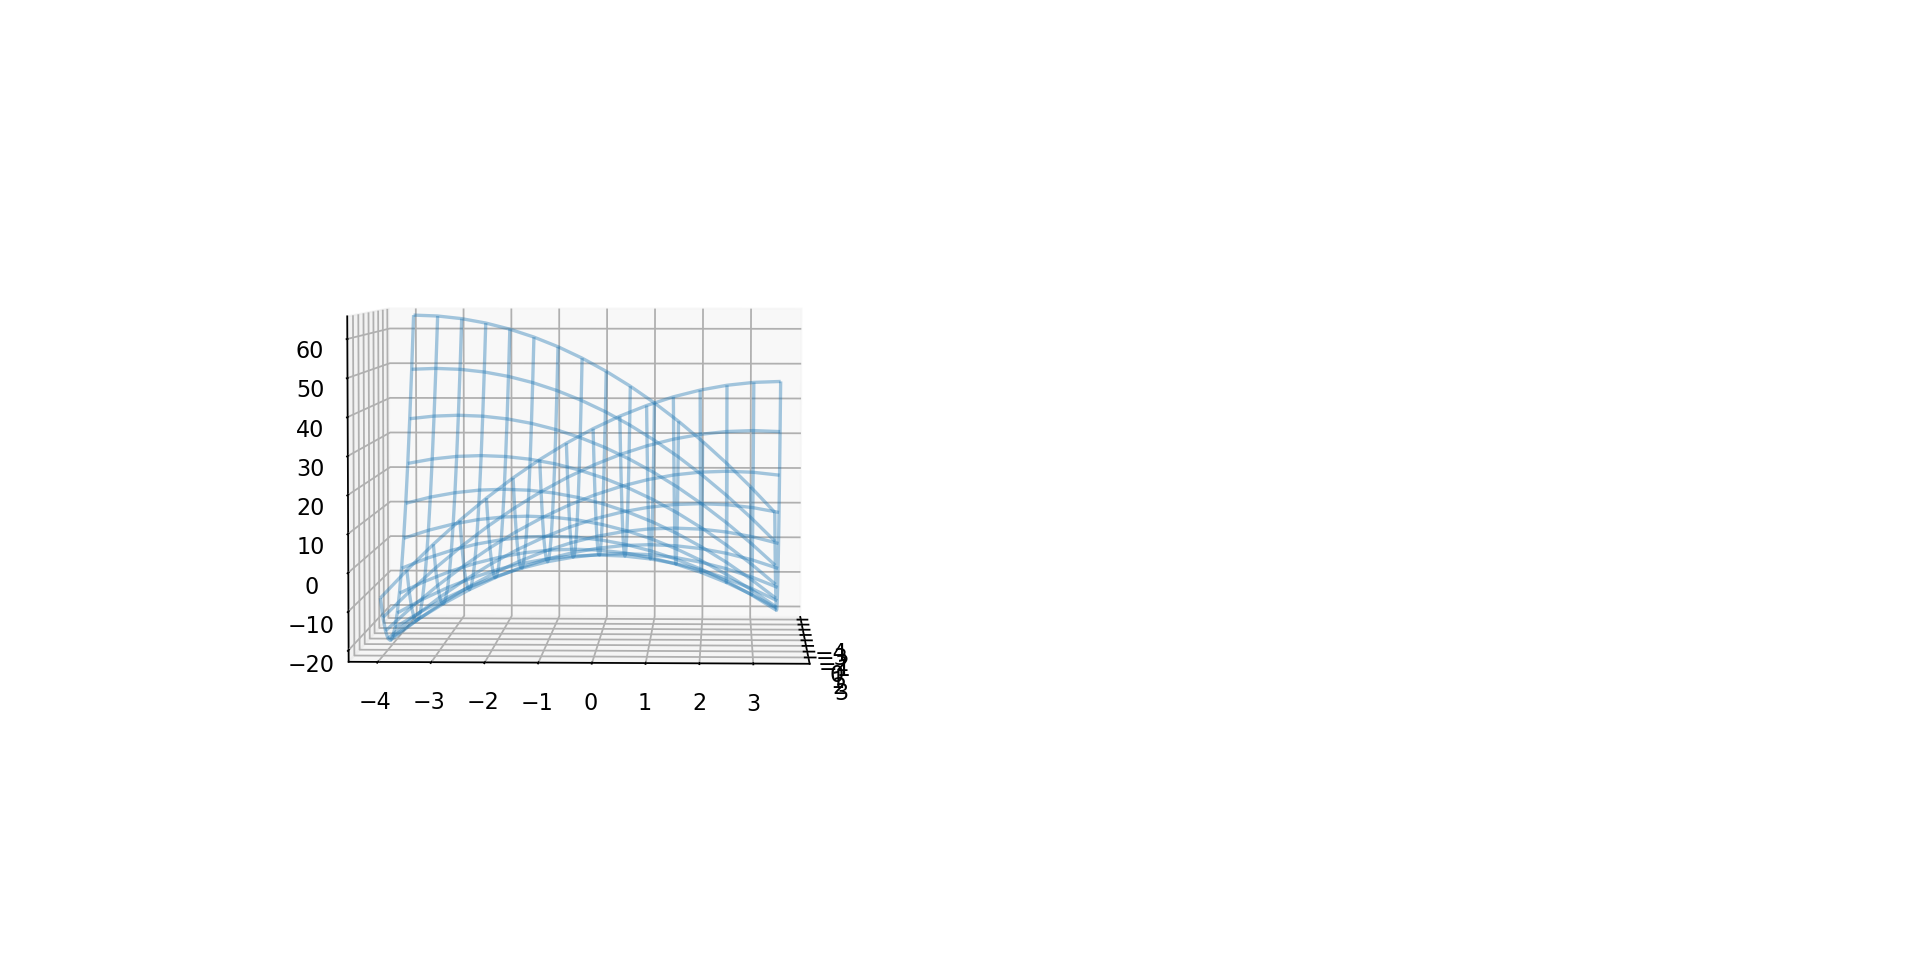

In [47]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')

x = np.arange(-4, 4, .5)
y = np.arange(-4, 4, .5)
X,Y = np.meshgrid(x,y)


def sQuadratic(v, S=S):
    return (S @ v) @ v

Z = np.apply_along_axis(sQuadratic, 0, np.array([X, Y]))

ax.plot_wireframe(X, Y, Z, alpha=0.4)
plt.show()


### Positive definite matrices

The quadratic form of $S$ has a saddle point at $\mathbf 0$.

Symmetric matrices with a quadratic form which is everywhere $\neq \mathbf 0$ positive are called **positive definit**.

#### Definition
A matrix $S$ is **positive definite** if and only if for all vectors $\mathbf x \neq \mathbf 0$:
$$
    \mathbf x' S \mathbf x > 0
$$


#### Example

In [48]:
S1 = Matrix([
    [2,-1],
    [-1,2]
])
S1

Matrix([
[ 2, -1],
[-1,  2]])

<IPython.core.display.Javascript object>


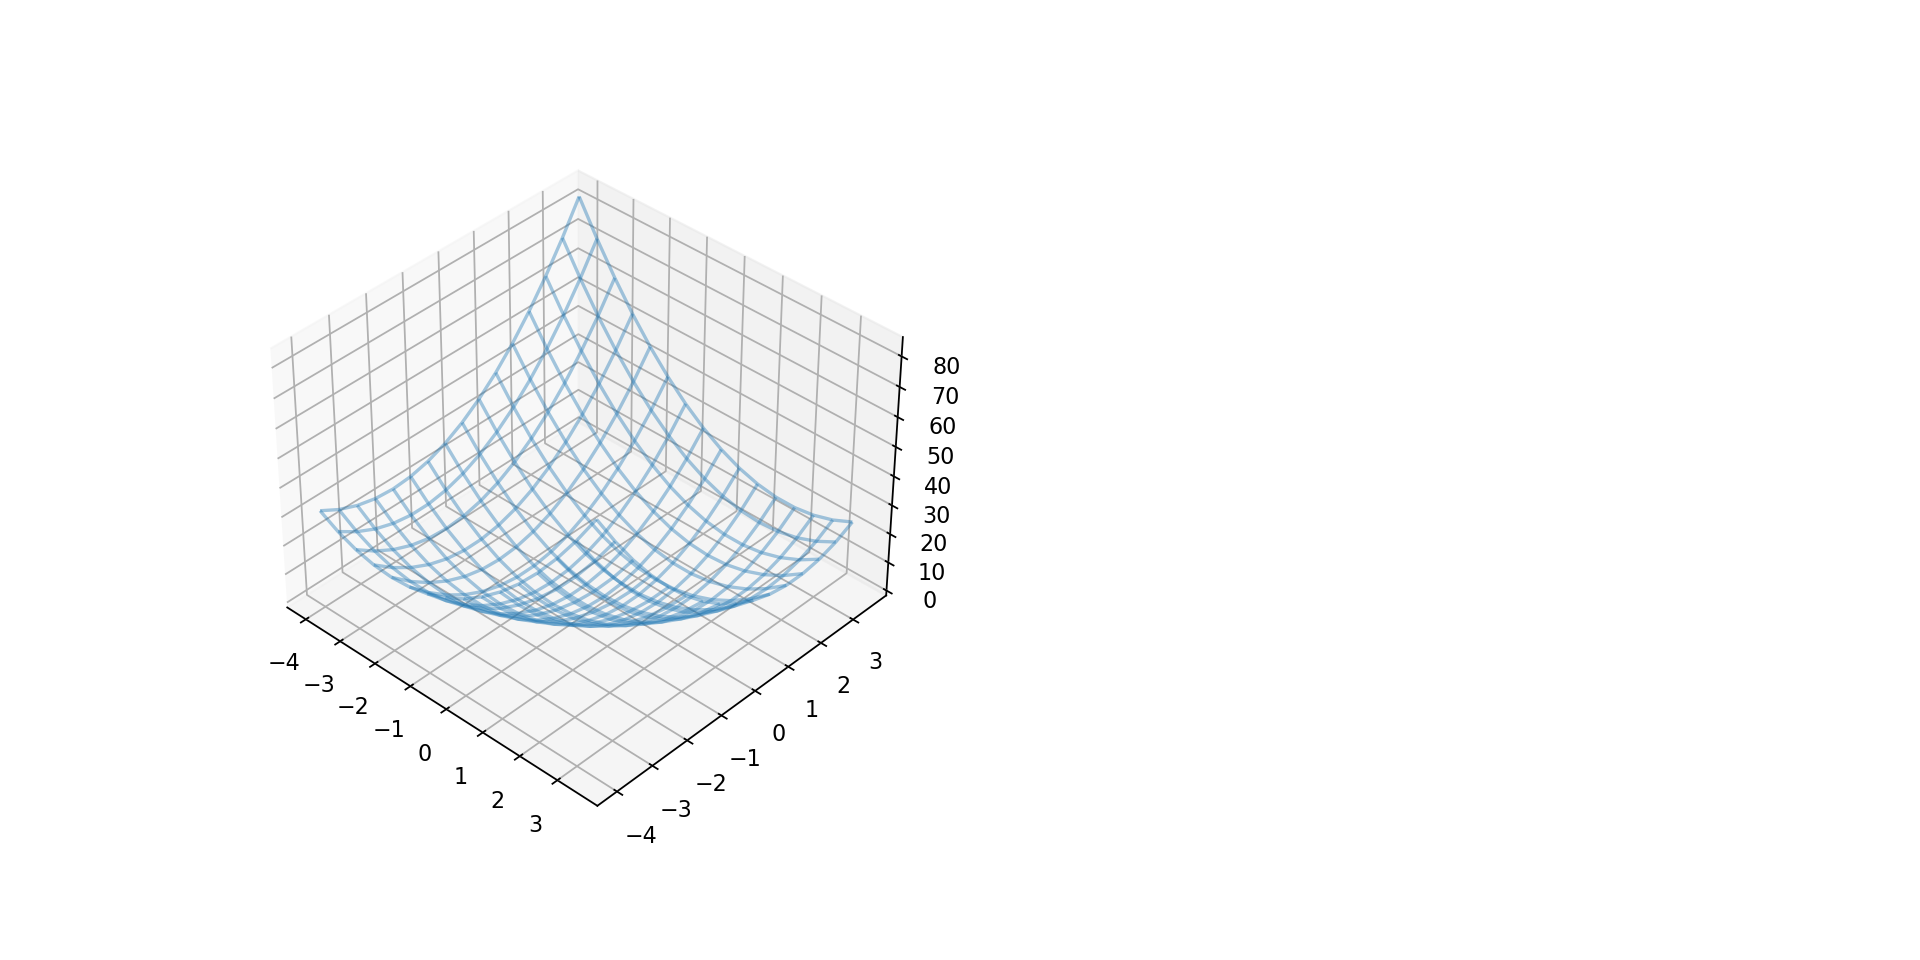

In [49]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')


Z = np.apply_along_axis(lambda v:sQuadratic(v, S1), 0, np.array([X, Y]))

ax.plot_wireframe(X, Y, Z, alpha=0.4)
plt.show()


Suppose we know that

$$
\begin{aligned}
\mathbf x^TS\mathbf x &> 0 & \forall \mathbf x:\mathbf x\neq \mathbf 0\\
S &= LDL^T
\end{aligned}
$$

This entails

$$
\begin{aligned}
\mathbf x^TS\mathbf x &> 0\\
\mathbf x^TLDL^T\mathbf x &> 0
\end{aligned}
$$

Let us introduce a variable $\mathbf y$

$$
\begin{aligned}
\mathbf y &= L^T\mathbf x\\
\mathbf x &= (L^T)^{-1}\mathbf y &(L\mbox{ must be invertible, which follows from definiteness.})\\
\mathbf y^T D\mathbf y &> 0\\
\sum_i d_i y_i^2 &> 0
\end{aligned}
$$

For each $i$, we can set $y_i=1$, $\forall j\neq i: y_j = 0$. It follows that
$$
\forall i: d_i > 0
$$

So if $S$ is positive defininte and the LU-decomposition gives $S = LDL^T$, all entries of $D$ must be positive.

We define

$$
(D^{\frac{1}{2}})_{ij} = \sqrt{d_{ij}}
$$

It follows that

$$
D = D^{\frac{1}{2}} D^{\frac{1}{2}}
$$

Taken together, we have

$$
S = LD^{\frac{1}{2}} D^{\frac{1}{2}}L^T
$$

It follows that for each positive definite matrix $S$ wich has an LU decomposition, there is a lower triangular matrix $M$ such that

$$
S = M M^T
$$

This factorization is called **Cholesky decomposition**.

In [50]:
S = Matrix([
    [2,-1,0],
    [-1,2,-1],
    [0,-1,2]
])
S

Matrix([
[ 2, -1,  0],
[-1,  2, -1],
[ 0, -1,  2]])

In [51]:
S.is_positive_definite

True

In [52]:
M = S.cholesky()
M

Matrix([
[   sqrt(2),          0,           0],
[-sqrt(2)/2,  sqrt(6)/2,           0],
[         0, -sqrt(6)/3, 2*sqrt(3)/3]])

In [53]:
M*M.T

Matrix([
[ 2, -1,  0],
[-1,  2, -1],
[ 0, -1,  2]])

In [54]:
S = Matrix([
    [3, 1],
    [1, -1]
])
S

Matrix([
[3,  1],
[1, -1]])

In [55]:
S.is_positive_definite

False

In [56]:
S.cholesky()

NonPositiveDefiniteMatrixError: Matrix must be positive-definite

### Fact

If a square matrix (not necessarily symmetric) is invertible, the following two matrices are positive definite:

$$
A A^T\\
A^T A
$$

## Vector spaces

In mathematics, vector spaces are not confined to $\mathbb R^n$. Any set can be a vector space if the following eight axioms are met.

<table border="0" style="width:100%;" align = "left">
<tbody><tr>
<th>Axiom</th>
<th>Meaning
</th>
    <tr>
    <td>Associativity of vector addition</td>
    <td><span class="texhtml"><b>u</b> + (<b>v</b> + <b>w</b>) = (<b>u</b> + <b>v</b>) + <b>w</b></span>
    </td></tr>
    
<tr style="background:#F8F4FF;">
<td>Commutativity of vector addition</td>
<td><span class="texhtml"><b>u</b> + <b>v</b> = <b>v</b> + <b>u</b></span>
</td></tr>
<tr>
<td>Identity element of vector addition</td>
<td>There exists an element <span class="texhtml"><b>0</b> ∈ <i>V</i></span>, called the <i>zero vector</i>, such that <span class="texhtml"><b>v</b> + <b>0</b> = <b>v</b></span> for all <span class="texhtml"><b>v</b> ∈ <i>V</i></span>.
</td></tr>
<tr style="background:#F8F4FF;">
<td>Inverse elements of vector addition</td>
<td>For every <span class="texhtml"><b>v</b> ∈ <i>V</i></span>, there exists an element <span class="texhtml">−<b>v</b> ∈ <i>V</i></span>, called the <i>additive inverse</i> of <span class="texhtml"><b>v</b></span>, such that <span class="texhtml"><b>v</b> + (−<b>v</b>) = <b>0</b></span>.
</td></tr>
<tr>
<td>Compatibility of scalar multiplication with field multiplication</td>
<td><span class="texhtml"><i>a</i>(<i>b</i><b>v</b>) = (<i>ab</i>)<b>v</b></span> 
</td></tr>
<tr style="background:#F8F4FF;">
<td>Identity element of scalar multiplication</td>
<td><span class="texhtml">1<b>v</b> = <b>v</b></span>, where <span class="texhtml">1</span> denotes the multiplicative identity in <span class="texhtml mvar" style="font-style:italic;">F</span>.
</td></tr>
<tr>
<td>Distributivityof scalar multiplication with respect to vector addition</td>
<td><span class="texhtml"><i>a</i>(<b>u</b> + <b>v</b>) = <i>a</i><b>u</b> + <i>a</i><b>v</b></span>
</td></tr>
<tr style="background:#F8F4FF;">
<td>Distributivity of scalar multiplication with respect to field addition</td>
<td><span class="texhtml">(<i>a</i> + <i>b</i>)<b>v</b> = <i>a</i><b>v</b> + <i>b</i><b>v</b></span>
</td></tr></tbody></table>

A subset $\alpha$ of a vector space is a **sub-space** if it is also a vector space.

This is guaranteed if two conditions are met: If $\mathbf u, \mathbf v\in \alpha$, 

- $\mathbf u + \mathbf v \in \alpha$
- for any scalar $c$, $c\mathbf u\in \alpha$.

### Column space of a matrix

For an $n\times m$ matrix $A$, the set $\{A\mathbf x:\mathbf x\in \mathbb R^m\}$ is a subspace of $\mathbb R^n$, because:

- $A\mathbf u + A\mathbf v = A(\mathbf u+\mathbf v)$
- $Ac\mathbf u = cA\mathbf u$

This vector space is called the **column space** of $A$, because it consists of all linear combinations of the column vectors of $A$.


The system of linear equation 
$$
A\mathbf x = \mathbf b
$$

is solvable if and only if $\mathbf b$ is in the column space of $A$.

So far we have focused on invertable matrices. In this case, the column space equals the entire vector space.

But what about non-invertable matrices?

We proceed per Gauss-Jordan elimination as usual. After the Gauss part, we will see whether the system is solvable.

$$
\begin{aligned}
\begin{bmatrix}
1 & 0\\
4 & 3\\
2 & 3
\end{bmatrix} \mathbf x &=
\begin{bmatrix}
1\\1\\0
\end{bmatrix}
\end{aligned}
$$

$$
\left[
\begin{array}{rr|r}
1 & 0 & 1\\
4 & 3 & 1\\
2 & 3 & 0
\end{array}
\right]\\[1em]
\left[
\begin{array}{rr|r}
1 & 0 & 1\\
0 & 3 & -3\\
0 & 3 & -2
\end{array}
\right]\\[1em]
\left[
\begin{array}{rr|r}
1 & 0 & 1\\
0 & 3 & -3\\
0 & 0 & 1
\end{array}
\right]\\[1em]
$$

There can't be a solution for the last row, so $\mathbf b$ is not in the column space of $A$.

Another example:

$$
\begin{aligned}
A & =
\begin{bmatrix}
1 & 2& 3\\
2 & 4 & 3\\
3 & 6 & 1
\end{bmatrix}\\[1em]
\mathbf b &= \begin{bmatrix} 4\\ 5\\ 4\end{bmatrix}\\[1em]
A\mathbf x &= \mathbf b
\end{aligned}
$$

$$
\left[
\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
2 & 4 & 3 & 5\\
3 & 6 & 1 & 4
\end{array}
\right]\\[1em]
\left[
\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
3 & 6 & 1 & 4
\end{array}
\right]\\[1em]
\left[
\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
0 & 0 & -8 & -8
\end{array}
\right]\\[1em]
\left[
\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
0 & 0 & 0 & 0
\end{array}
\right]\\[1em]
\left[
\begin{array}{rrr|r}
1 & 2 & 0 & 1\\
0 & 0 & -3 & -3\\
0 & 0 & 0 & 0
\end{array}
\right]\\[1em]
\left[
\begin{array}{rrr|r}
1 & 2 & 0 & 1\\
0 & 0 & 1 & 1\\
0 & 0 & 0 & 0
\end{array}
\right]\\[1em]
$$


Since the left side is not the identity matrix, we cannot simply read off the solution from the right side.

### Pivots

A pivot cell in a matrix $A$ is a cell $a_{ij}$ with an entry $\neq 0$ such that
$$
\begin{aligned}
a_{ij} &\neq 0\\
\forall k \geq i, l< j: &  a_{kl} = 0
\end{aligned}
$$

During Gauss elimination, we

- go top-down through the rows,
- identify the pivot in the current row, and
- transform all cells below the pivot into $0$ using elimination.

A column with a pivot in it is called *pivot column*.

A column without a pivot in it is called *free column*.




After Gauss-Jordan elimination, we find the *canonical solution* by
- setting all positions corresponding to a free column to $0$, and
- setting all positions corresponding to a pivot column to the entry on the the same row as the pivot on the right side.

For our example above, the solution thus found is
$$
\begin{bmatrix}
1 \\ 0 \\ 1
\end{bmatrix}
$$

The result of Gauss elimination is called **row echelon form**.

The result of Gauss-Jordan elimination is called **reduced row echelon form**.

In [58]:
A = Matrix([
    [1,2,3],
    [2,4,3],
    [3,6,1]
])
A

Matrix([
[1, 2, 3],
[2, 4, 3],
[3, 6, 1]])

In [59]:
rr, i = A.rref()

In [60]:
rr

Matrix([
[1, 2, 0],
[0, 0, 1],
[0, 0, 0]])

In [61]:
i

(0, 2)

## The nullspace of a matrix

The canonical solution is only one of infinitely many solutions.

$$
\begin{aligned}
A & =
\begin{bmatrix}
1 & 2& 3\\
2 & 4 & 3\\
3 & 6 & 1
\end{bmatrix}\\[1em]
\mathbf b &= \begin{bmatrix} 4\\ 5\\ 4\end{bmatrix}\\[1em]
A\mathbf x &= \mathbf b\\
\mathbf x &= \begin{bmatrix}
1 \\ 0 \\ 1
\end{bmatrix}, 
\begin{bmatrix}
-1 \\ 1 \\ 1
\end{bmatrix},
\begin{bmatrix}
3 \\ -1 \\ 1
\end{bmatrix},\cdots
\end{aligned}
$$

How do we find all solutions?

Suppose we have a solution $\mathbf y$ to 

$$
A\mathbf y = \mathbf 0
$$

Let $\mathbf x$ be the canonical solution to

$$
A\mathbf x = \mathbf b
$$

It follows:

$$
\begin{aligned}
A\mathbf x + A\mathbf y &= \mathbf x + \mathbf 0\\
A(\mathbf x + \mathbf y) &= \mathbf b
\end{aligned}
$$

The set of solutions $\mathbf y$ to $A\mathbf y = \mathbf 0$ form a *vector space*:




Suppose $A\mathbf y_1 = \mathbf 0$ and $A\mathbf y_2 = \mathbf 0$.

$$
\begin{aligned}
A(\mathbf y_1 + \mathbf y_2) &= A\mathbf y_1 + A\mathbf y_2\\
&= \mathbf 0 + \mathbf 0\\
&= \mathbf 0\\[2em]
A(c\mathbf y_1) &= cA\mathbf y_1\\
&= c~\mathbf 0\\
&=\mathbf 0
\end{aligned}
$$

The set of solutions $\mathbf y$ to $A\mathbf y = \mathbf 0$ is called the **nullspace** of $A$.

### How to find the null space

For each free column $i$ in the reduced row echelon form or $A$:
- set $y_i = 1$,
- set $y_j = 0$ for all free columns $j\neq i$,
- solve $A\mathbf y = \mathbf 0$ via substitution.



In [62]:
A = Matrix([
    [1,2,3],
    [2,4,3],
    [3,6,1]
])
A

Matrix([
[1, 2, 3],
[2, 4, 3],
[3, 6, 1]])

In [63]:
rr,_ = A.rref()
rr

Matrix([
[1, 2, 0],
[0, 0, 1],
[0, 0, 0]])

$$
\begin{aligned}
\left[\begin{matrix}1 & 2 & 0\\0 & 0 & 1\\0 & 0 & 0\end{matrix}\right]
\begin{bmatrix}
a \\ 1 \\ b
\end{bmatrix}
&= \begin{bmatrix}
0\\0\\0
\end{bmatrix}\\
a + 2 &= 0\\
b &= 0\\
a &= -2\\
\mathbf y &= 
\begin{bmatrix}
-2\\1\\0
\end{bmatrix}\\[2em]
\left[\begin{matrix}1 & 2 & 3\\2 & 4 & 3\\3 & 6 & 1\end{matrix}\right]
\begin{bmatrix}
-2\\1\\0
\end{bmatrix} &= \begin{bmatrix}
0\\0\\0
\end{bmatrix}
\end{aligned}
$$